In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [19]:


def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    ## break this in to two parts regulization and loss term 
    regularization_term=l2_param*np.dot(theta,theta) ## l_2 regulairzation term 
    eta=X@theta                         
    loss_term = np.logaddexp(0, -y* eta)
    return regularization_term+np.mean(loss_term,axis=1)


def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''

    x0=np.ones(X.shape[1])
    res=sp.optimize.minimize(objective_function, x0, args=( X, y, l2_param ))
    return res.x
        

## load and pre-process data 

In [5]:
X_train= pd.read_csv(r'/home/buzgalbraith/work/school/spring_2023/Machine_Learning_spring_2023/homework_code/hw4/logistic-code/X_train.txt', sep=",")
y_train=pd.read_csv(r'/home/buzgalbraith/work/school/spring_2023/Machine_Learning_spring_2023/homework_code/hw4/logistic-code/y_train.txt')
X_test=pd.read_csv(r'/home/buzgalbraith/work/school/spring_2023/Machine_Learning_spring_2023/homework_code/hw4/logistic-code/X_val.txt')
y_test=pd.read_csv(r'/home/buzgalbraith/work/school/spring_2023/Machine_Learning_spring_2023/homework_code/hw4/logistic-code/y_val.txt')

def standardize(X_train,X_test):
    X_train= (X_train - np.mean(X_train) ) / np.std(X_train)
    X_test=( X_test - np.mean(X_test) ) / np.std(X_test)
    return X_train, X_test
def add_bias_term(X_train, X_test):
    X_train["bias"]=np.ones(X_train.shape[0])
    X_test["bias"]=np.ones(X_test.shape[0])
    return X_train, X_test
X_train, X_test=standardize(X_train,X_test)
X_train, X_test=add_bias_term(X_train, X_test)
y_train=y_train.T

/home/buzgalbraith/miniconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/buzgalbraith/miniconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [21]:
w=fit_logistic_reg( X=X_train, y=y_train,objective_function=f_objective )
w
theta_t=np.ones(X_train.shape[1])
f_objective(theta_t, X_train, y_train, l2_param=1)


0.000000000000000000e+00    21.97967
dtype: float64

## question 8

In [52]:

def log_likelyhood(w,X,y):
    eta=X@w
    return np.sum(np.logaddexp(0, -y.T * eta) + np.logaddexp(0, (1 - y.T) * eta),axis=1)
def test_l2(min_val, max_val):
    losses=[]
    for lambda_param in np.linspace(min_val,max_val,50):
        w = fit_logistic_reg( X=X_train, y=y_train,objective_function=f_objective, l2_param=lambda_param)
        losses.append(log_likelyhood(w, X_test , y_test))
    losses=np.array(losses)
    plt.plot(np.linspace(min_val,max_val,50), losses)
    plt.ylabel("log likelihood of validation set ")
    plt.xlabel("$\lambda$")


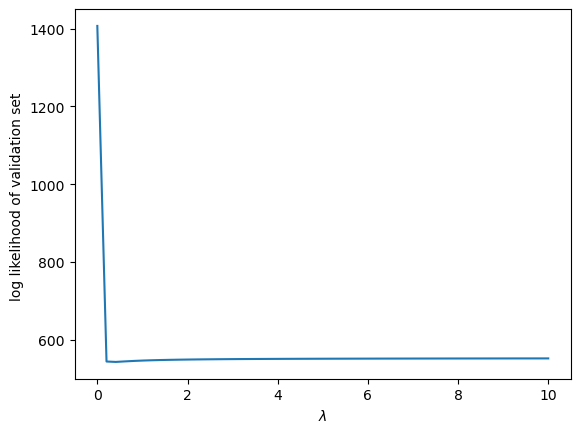

In [53]:
test_l2(.0001,10)

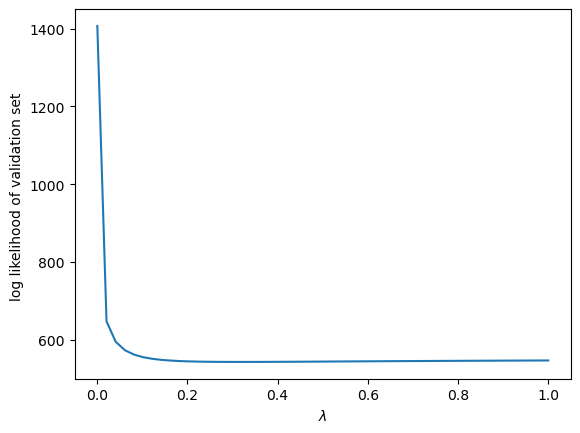

In [54]:
test_l2(.0001,1)

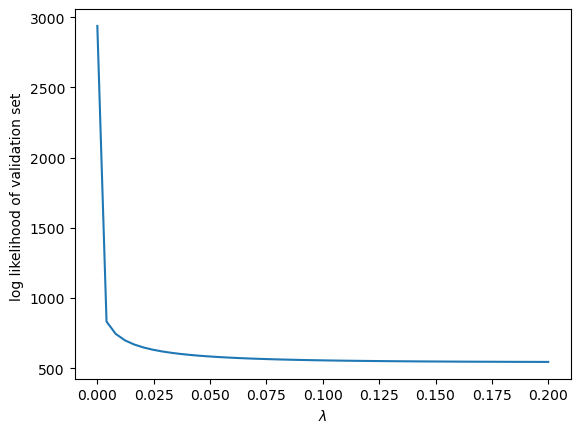

In [86]:
test_l2(0.0000001,.2)